In [1]:
# HIDE CODE

# Python setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from ipywidgets import interactive
from ipywidgets import interact, IntSlider

In [2]:
# load data
iris = load_iris()

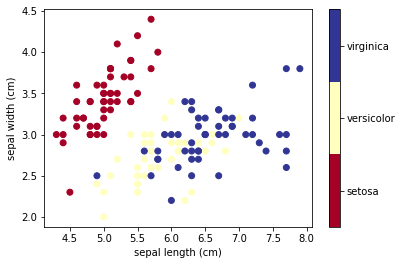

In [3]:
# HIDE CODE
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
            
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

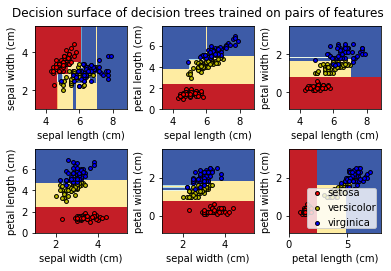

In [4]:
# HIDE CODE

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

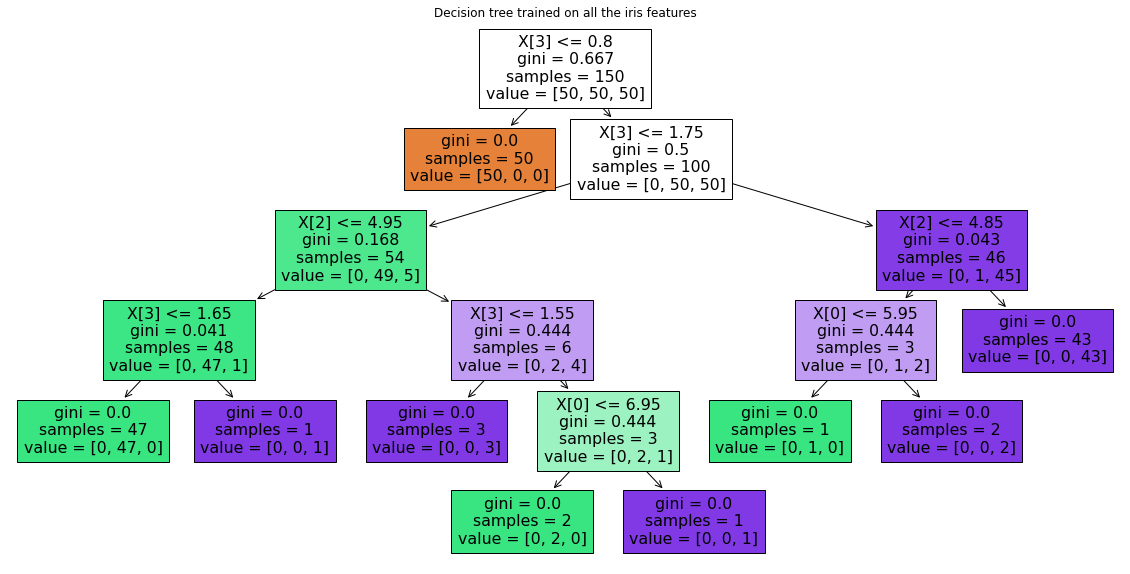

In [5]:
# HIDE CODE

X = iris.data
y = iris.target

clf = DecisionTreeClassifier().fit(X, y)

plt.subplots(figsize=(20, 10))
plot_tree(clf, filled=True)

plt.title("Decision tree trained on all the iris features")
plt.show()

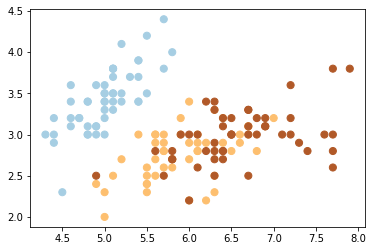

In [6]:
# HIDE CODE
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

In [7]:
# HIDE CODE

def visualize_tree(estimator, X, y, boundaries=True, xlim=None, ylim=None):
    
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.clim(y.min(), y.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-r')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-r')
            plot_boundaries(tree.children_left[i], xlim, [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim, [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

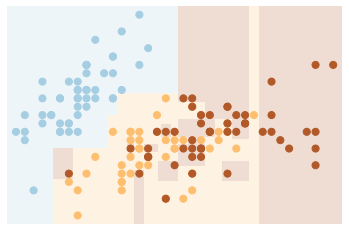

In [8]:
# use 2 features
X = iris.data[:,:2]
y = iris.target

# create model
clf = DecisionTreeClassifier()

# visualize boundaries of classifier with custom function
visualize_tree(clf, X , y, boundaries=False)

In [9]:
def interactive_tree(depth=1):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    visualize_tree(clf, X, y)
    plt.show()

interactive(interactive_tree, depth=(1, 5))

interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

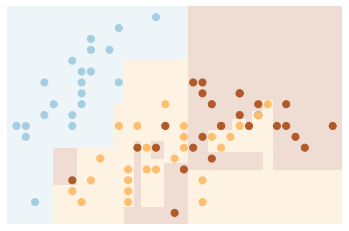

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

clf = DecisionTreeClassifier()

visualize_tree(clf, X_train, y_train, boundaries=False)

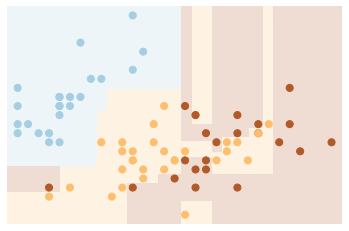

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=123)

clf = DecisionTreeClassifier()

visualize_tree(clf, X_train, y_train, boundaries=False)

In [12]:
# HIDE CODE

def fit_randomized_tree(random_state=0):
#    X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:20]], y[i[:20]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    plt.show()
    
interact(fit_randomized_tree, random_state=IntSlider(
    min=0, max=100, description='Random state', style={'description_width': 'auto'}, continuous_update=False
));

interactive(children=(IntSlider(value=0, continuous_update=False, description='Random state', style=SliderStyl…

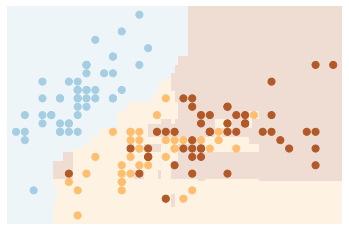

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

visualize_tree(clf, X, y, boundaries=False);

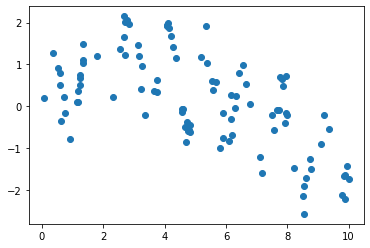

In [14]:
# HIDE CODE

# make data
x = 10 * np.random.rand(100)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)

plt.scatter(x, y);

In [15]:
xfit = np.linspace(0, 10, 1000)

clf = RandomForestRegressor(100)
clf.fit(x[:, None], y)

yfit = clf.predict(xfit[:, None])

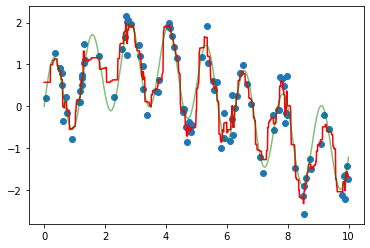

In [16]:
# HIDE CODE
ytrue = model(xfit, 0)

plt.scatter(x, y)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-g', alpha=0.5);

In [17]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [18]:
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


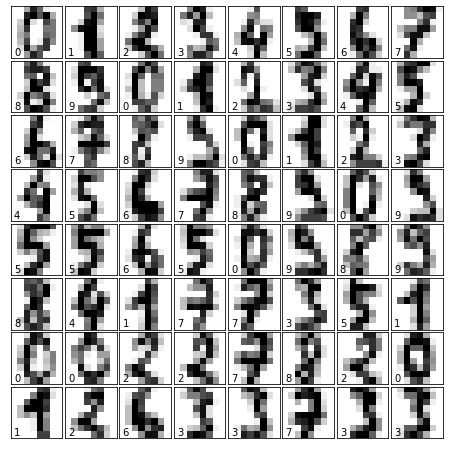

In [19]:
# HIDE CODE
# Set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_depth=11)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Model accuracy: {metrics.accuracy_score(y_pred, y_test):.2f}")

Model accuracy: 0.84


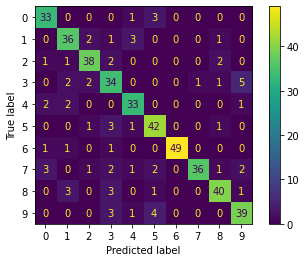

In [21]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [22]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.825     0.892     0.857        37
           1      0.800     0.837     0.818        43
           2      0.864     0.864     0.864        44
           3      0.694     0.756     0.723        45
           4      0.825     0.868     0.846        38
           5      0.808     0.875     0.840        48
           6      1.000     0.942     0.970        52
           7      0.973     0.750     0.847        48
           8      0.870     0.833     0.851        48
           9      0.812     0.830     0.821        47

    accuracy                          0.844       450
   macro avg      0.847     0.845     0.844       450
weighted avg      0.851     0.844     0.846       450

